In [1]:
import sys
!{sys.executable} -m pip install seaborn


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
import sys
!{sys.executable} -m pip install nltk


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [15]:
import sys
!{sys.executable} -m pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 4.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.2.2-cp310-cp310-macosx_13_0_arm64.whl size=154629 sha256=89f01f2f5e6edff5139315c062d15e51b3383b06f22cc638f0d3418cd6b157d6
  Stored in directory: /Users/sravanthikanchi/Library/Caches/pip/wheels/30/52/73/36458d38e3c533678a3043949ad72658025d8e89d942439d49
Successfully built wordcloud

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
import sys

In [4]:
tweetfile = pd.read_csv("russiaukrainetweets.csv")

In [5]:
tweetfile.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630366235354451969,1630152070530576385,2023-02-28 00:36:15 UTC,2023-02-28,00:36:15,0,1493761817406894086,tomasliptai,Tomas Liptai,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nazijaeger__', 'name': 'nazi...",NaN,NaN,NaN,NaN
1,1630366226424778753,1630366226424778753,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1526694166662721536,paperfloure,Smell the roses,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1630366225930027011,1630366225930027011,2023-02-28 00:36:13 UTC,2023-02-28,00:36:13,0,1053018392939167746,katetbar1,@etak,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630366223056662530,1630351686974992385,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,602371247,jlhrdhmom,JLHrdh,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'MainelifeR', 'name': 'Mainel...",NaN,NaN,NaN,NaN
4,1630366221483884545,1629903982255644672,2023-02-28 00:36:12 UTC,2023-02-28,00:36:12,0,1053594763214184448,phemikali,rolarkcybersecurity,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Pottingpinks', 'name': 'GRS'...",NaN,NaN,NaN,NaN


In [6]:
## display all columns 
tweetfile.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
## selecting only necessary columns 
tweets_file = tweetfile[['username','tweet','language']]

In [8]:
tweets_file.head()

,username,tweet,language
0,tomasliptai,@nazijaeger__ @derwener @Anonymous9775 Russia ...,en
1,paperfloure,The Russia HAARP which could destroy USA in on...,en
2,katetbar1,Putin gives Steven Seagal Russia&amp;#8217;s O...,en
3,jlhrdhmom,@MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...,en
4,phemikali,@Pottingpinks @mfa_russia @mod_russia @mil_his...,en


In [9]:
## checking if there are any null values
tweets_file.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [10]:
tweets_file['language']

0        en
1        en
2        en
3        en
4        en
         ..
10009    en
10010    en
10011    en
10012    en
10013    en
Name: language, Length: 10014, dtype: object

In [11]:
## this gives count of tweets in each language 
tweets_file['language'].value_counts()

en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
ca       20
qht      20
th       19
fr       18
de       14
ko        9
vi        8
nl        8
ro        7
fi        7
ar        6
zxx       6
uk        6
cs        6
zh        5
pl        5
qam       4
tl        4
da        3
eu        2
no        2
hi        2
tr        2
hu        1
cy        1
lv        1
el        1
bn        1
Name: language, dtype: int64

In [12]:
## display the tweet column 
tweets_file['tweet']

0        @nazijaeger__ @derwener @Anonymous9775 Russia ...
1        The Russia HAARP which could destroy USA in on...
2        Putin gives Steven Seagal Russia&amp;#8217;s O...
3        @MainelifeR @BaddCompani It’s ALWAYS PROJECTIO...
4        @Pottingpinks @mfa_russia @mod_russia @mil_his...
                               ...                        
10009    @wallacemick Its not Ukraine which investere w...
10010    @tom_username_ There were very dark rumors tha...
10011    @elonmusk If Russia lose the Rothschild are co...
10012    @RonFilipkowski Look forward to Russia liberat...
10013    @Lyla_lilas I read it yes. It is heartbreaking...
Name: tweet, Length: 10014, dtype: object

In [107]:
## for lemmatization 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sravanthikanchi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sravanthikanchi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [108]:
## Remove stopwords, punctuations and other language errors from dataset
nltk.download('stopwords')
snow = nltk.SnowballStemmer("english")
stop=set(stopwords.words('english'))
lem = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sravanthikanchi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
## Data cleaning -- cleaning tweet data, apply snowball stemmer
def clean_tweets(text):
    text = str(text).lower()
    text = re.sub("[^-9A-Za-z ]", "" , text) ## -- remove punctuations
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [w for w in text.split(' ') if w not in stopwords.words('english')]
    text = [snow.stem(word) for word in text]
    text=" ".join(text)
    #print(type(text))
    return text

In [92]:
#clean_tw = clean_tweets(tweets_file['tweet'])
tweets_file["tweet"] = tweets_file["tweet"].apply(clean_tweets)
tweets_file["tweet"]
#type(clean_tw) -- str

/var/folders/qy/3zc7ny4578b0_dmcyhk4fm_80000gn/T/ipykernel_2927/683738733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_file["tweet"] = tweets_file["tweet"].apply(clean_tweets)


0            nazijaeg derwen  russia place satan rule well
1        russia haarp could destroy usa one fell swoop ...
2        putin give steven seagal russiaamp order frien...
3                mainelif baddcompani alway project russia
4        pottingpink mfarussia modrussia milhistrf muze...
                               ...                        
10009    wallacemick ukrain invester war russia putin w...
10010    tomusernam dark rumor zelenski regim traffick ...
10011    elonmusk russia lose rothschild come u next ru...
10012        ronfilipkowski look forward russia liber kiev
10013    lylalila read yes heartbreak  russia terrorist...
Name: tweet, Length: 10014, dtype: object

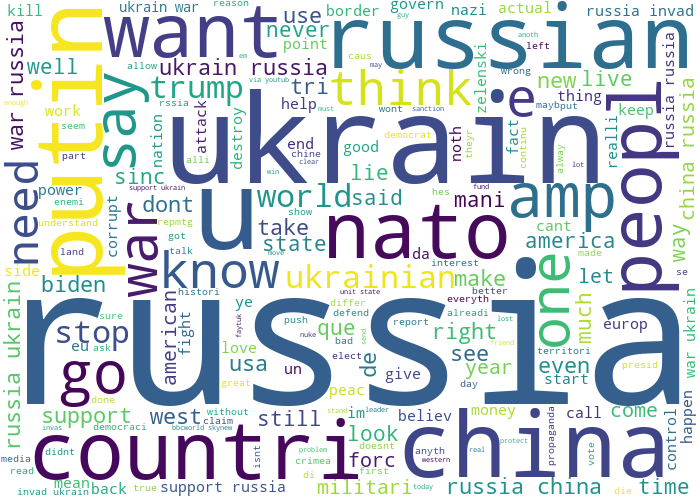

In [96]:
tweet_str = " ".join(i for i in tweets_file.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",contour_color='steelblue',width=700, height=500, scale=1, max_font_size=500,)
wordcloud.generate(tweet_str)
wordcloud.to_image()

In [104]:
#from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [109]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sravanthikanchi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [113]:
tweets_file["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets_file.tweet]


/var/folders/qy/3zc7ny4578b0_dmcyhk4fm_80000gn/T/ipykernel_2927/2594279587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_file["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in tweets_file.tweet]


In [116]:
tweets_file["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets_file["tweet"]]
tweets_file["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweets_file["tweet"]]
tweets_file = tweets_file[["tweet", "Positive", "Negative", "Neutral"]]
print(tweets_file.head())

/var/folders/qy/3zc7ny4578b0_dmcyhk4fm_80000gn/T/ipykernel_2927/1335734444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_file["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in tweets_file["tweet"]]


                                               tweet  Positive  Negative  \
0      nazijaeg derwen  russia place satan rule well     0.259     0.000   
1  russia haarp could destroy usa one fell swoop ...     0.000     0.259   
2  putin give steven seagal russiaamp order frien...     0.293     0.000   
3          mainelif baddcompani alway project russia     0.000     0.000   
4  pottingpink mfarussia modrussia milhistrf muze...     0.068     0.078   

   Neutral  
0    0.741  
1    0.741  
2    0.707  
3    1.000  
4    0.854  


/var/folders/qy/3zc7ny4578b0_dmcyhk4fm_80000gn/T/ipykernel_2927/1335734444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_file["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in tweets_file["tweet"]]


In [118]:
tweets_file

,tweet,Positive,Negative,Neutral
0,nazijaeg derwen russia place satan rule well,0.259,0.000,0.741
1,russia haarp could destroy usa one fell swoop ...,0.000,0.259,0.741
2,putin give steven seagal russiaamp order frien...,0.293,0.000,0.707
3,mainelif baddcompani alway project russia,0.000,0.000,1.000
4,pottingpink mfarussia modrussia milhistrf muze...,0.068,0.078,0.854
...,...,...,...,...
10009,wallacemick ukrain invester war russia putin w...,0.000,0.438,0.562
10010,tomusernam dark rumor zelenski regim traffick ...,0.000,0.112,0.888
10011,elonmusk russia lose rothschild come u next ru...,0.000,0.184,0.816
10012,ronfilipkowski look forward russia liber kiev,0.000,0.000,1.000


In [122]:
tweets_file.to_csv("TwitterSentimentAnalysis_RussiaUkraineWar.csv",index=False)

In [124]:
print()